# Contents
Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)

### [1. Introduction](#Introduction)

### [2. Exploratory Data Analysis](#Exploratory-Data-Analysis)

#### [2.1. Distributions](#Distributions)

#### [2.2. Exploration The Trees](#Exploration-The-Trees)

#### [2.3. F2 Metric Analysis](#F2-Metric-Analysis)

#### [2.4. Feature Engineering](#Feature-Engineering)

### [3. Validation](#Validation)

#### [3.1. Sklearn](#Sklearn)

#### [3.2. Transformers](#Transformers)

### [4. Modeling](#Modeling)

Pulled down on Wednesday, January 25, 2023

https://www.kaggle.com/code/hasanbasriakcay/learning-equality-eda-fe-modeling


# Introduction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
import datetime as dt
import math

np.random.seed(0)
warnings.simplefilter("ignore")

In [2]:
from IPython.core.display import HTML
def nan_counts_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].isna().sum(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def nunqiue_all(df_dict):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for key in df_dict:
        table_list.append(pd.DataFrame(df_dict[key].nunique(), columns=[key]))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

def value_counts_all(df, columns):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts()))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [3]:
BASE_DIR = "/kaggle/input/learning-equality-curriculum-recommendations/"
BASE_DIR = "data/"
content = pd.read_csv(BASE_DIR+"content.csv")
correlations = pd.read_csv(BASE_DIR+"correlations.csv")
topic = pd.read_csv(BASE_DIR+"topics.csv")
sub = pd.read_csv(BASE_DIR+"sample_submission.csv")

display(content.head())
display(topic.head())
display(correlations.head())
display(sub.head())

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4


,topic_id,content_ids
0,t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1,t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2,t_00069b63a70a,c_11a1dc0bfb99
3,t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4,t_4054df11a74e,c_3695c5dc1df6 c_f2d184a98231


In [4]:
print("content shape:", content.shape)
print("topic shape:", topic.shape)
print("correlations shape:", correlations.shape)
print("sub shape:", sub.shape)

content shape: (154047, 8)
topic shape: (76972, 9)
correlations shape: (61517, 2)
sub shape: (5, 2)


In [5]:
print("content nan value sum:", content.isna().sum().sum())
print("topic nan value sum:", topic.isna().sum().sum())
print("correlations nan value sum:", correlations.isna().sum().sum())
print("sub nan value sum:", sub.isna().sum().sum())

content nan value sum: 306850
topic nan value sum: 42192
correlations nan value sum: 0
sub nan value sum: 0


In [6]:
df_dict = {
    'Content':content,
    'Topic':topic
}
nan_counts_all(df_dict)

,Content
id,0
title,9
description,64591
kind,0
text,80012
language,0
copyright_holder,82226
license,80012
,Topic
id,0


In [7]:
content["license"] = content["license"].fillna("None")

In [8]:
print("content dublicated value sum:", content.duplicated().sum().sum())
print("topic dublicated value sum:", topic.duplicated().sum().sum())
print("correlations dublicated value sum:", correlations.duplicated().sum().sum())
print("sub dublicated value sum:", sub.duplicated().sum().sum())

content dublicated value sum: 0
topic dublicated value sum: 0
correlations dublicated value sum: 0
sub dublicated value sum: 0


In [9]:
nunqiue_all(df_dict)

,Content
id,154047
title,130937
description,76305
kind,5
text,70687
language,27
copyright_holder,148
license,8
,Topic
id,76972


In [10]:
value_counts_all(content, ["kind", "language", "license"])

,kind
video,61487
document,33873
html5,32563
exercise,25925
audio,199
,language
en,65939
es,30844
fr,10682
pt,10435


In [11]:
value_counts_all(topic, ["category", "level", "language", "has_content"])

,category
source,43487
supplemental,19368
aligned,14117
,level
4,38810
3,14898
5,9744
6,6210
2,4874
1,1104


# Exploratory Data Analysis

In [12]:
def cat_cat_dist(data=None, feat1="", feat2="", feat1_lim="all", h=True, figsize=(16, 4), title="", title_fontsize=20, rotate=False, cut_xlabel=False):
    data_copy = data.copy()
    data_copy.loc[:, "count"] = 1
    if feat1_lim != "all":
        feat1_lim_value = data_copy[feat1].value_counts().index[:feat1_lim]
        data_copy = data_copy.loc[data_copy[feat1].isin(feat1_lim_value), :]
        if cut_xlabel:
            data_copy[feat1] = data_copy[feat1].str[:int((1/feat1_lim)*400)]
    data_copy = data_copy.groupby([feat1, feat2], as_index=False).agg({"count":"sum"})
    data_copy_div = data_copy.groupby([feat1], as_index=False).agg({"count":"sum"})
    data_copy_div.columns = [feat1, "div"]
    data_copy = data_copy.merge(data_copy_div, on=feat1)
    data_copy["normalized_count"] = data_copy["count"] / data_copy["div"] 
    data_copy.sort_values("count", inplace=True, ascending=False)
    if h:
        fig, axes = plt.subplots(2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle(title, fontsize=title_fontsize)
        sns.barplot(data=data_copy, x=feat1, y="count", hue=feat2, ax=axes[0])
        sns.barplot(data=data_copy, x=feat1, y="normalized_count", hue=feat2, ax=axes[1])
        if rotate:
            x_labels = data_copy[feat1].unique()
            axes[0].set_xticklabels(x_labels, rotation = 45)
            axes[1].set_xticklabels(x_labels, rotation = 45)
            fig.tight_layout()

## Distributions

## Correlations

In [13]:
content_ids_df = pd.DataFrame()
content_ids = correlations["content_ids"].str.split(" ")
content_ids_df["topic_id"] = correlations["topic_id"].values
content_ids_df["content_ids"] = content_ids
content_ids_df["content_ids_len"] = content_ids.str.len()
content_ids_df = content_ids_df.merge(topic[["id", "has_content"]], left_on="topic_id", right_on="id")

content_ids_df.head()

,topic_id,content_ids,content_ids_len,id,has_content
0,t_00004da3a1b2,"[c_1108dd0c7a5d, c_376c5a8eb028, c_5bc0e1e2cba...",4,t_00004da3a1b2,True
1,t_00068291e9a4,"[c_639ea2ef9c95, c_89ce9367be10, c_ac1672cdcd2...",4,t_00068291e9a4,True
2,t_00069b63a70a,[c_11a1dc0bfb99],1,t_00069b63a70a,True
3,t_0006d41a73a8,"[c_0c6473c3480d, c_1c57a1316568, c_5e375cf14c4...",5,t_0006d41a73a8,True
4,t_0008768bdee6,"[c_34e1424229b4, c_7d1a964d66d5, c_aab93ee667f4]",3,t_0008768bdee6,True


In [14]:
content_ids_df.groupby("has_content").agg({"content_ids_len":["mean", "median"]})

content_ids_len       
                       mean median
has_content                       
True               4.550271    3.0

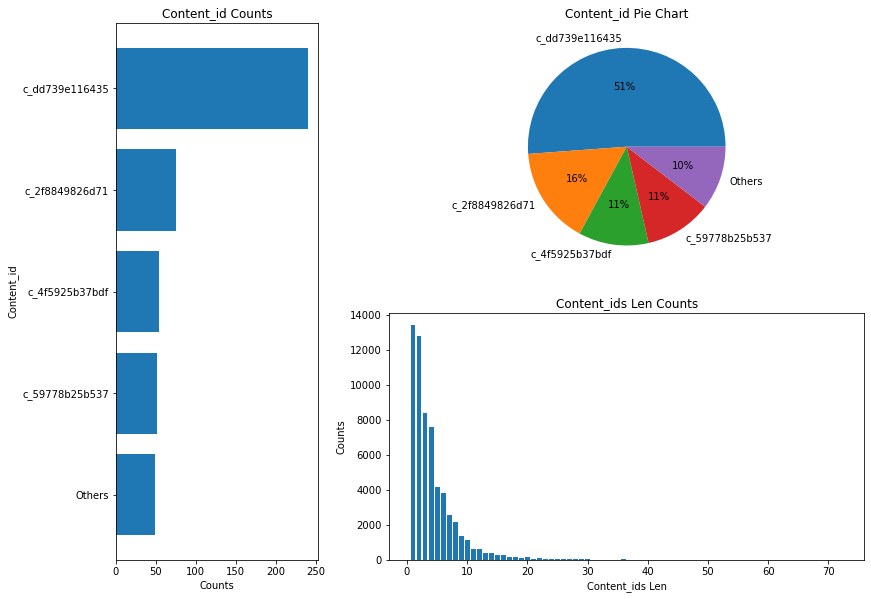

In [15]:
fig = plt.figure(figsize=(16, 12)) # initialize figure
axes = [None for _ in range(3)] # list to save many ax for setting parameter in each
axes[0] = plt.subplot2grid((3,4), (0,0), colspan=1, rowspan=2)
axes[1] = plt.subplot2grid((3,4), (0,1), colspan=2)
axes[2] = plt.subplot2grid((3,4), (1,1), colspan=2)

# Chart 0
content_dict = {content_id: 0 for content_id in content["id"]}
for index, row in content_ids_df.iterrows():
    for content_id in row["content_ids"]:
        content_dict[content_id]+=1

content_ids_count_series = pd.Series(content_dict)
content_ids_count_series.sort_values(inplace=True, ascending=False)

content_ids_count_df = content_ids_count_series.to_frame()
content_ids_count_df.reset_index(inplace=True)
content_ids_count_df.columns = ["content_id", "count"]

content_ids_count_df.loc[content_ids_count_df["count"]<=49, ["content_id", "count"]] = ["Others", 49]
content_ids_count_df.drop_duplicates(inplace=True)

axes[0].barh(content_ids_count_df["content_id"][::-1], content_ids_count_df["count"][::-1]);
axes[0].set_title("Content_id Counts")
axes[0].set_xlabel("Counts")
axes[0].set_ylabel("Content_id")

# Chart 1
axes[1].pie(content_ids_count_df["count"], labels = content_ids_count_df["content_id"],  autopct='%.0f%%');
axes[1].set_title("Content_id Pie Chart")

# Chart 2
content_ids_len_counts = content_ids_df["content_ids_len"].value_counts()[:50]
axes[2].bar(content_ids_len_counts.index, content_ids_len_counts.values)
axes[2].set_title("Content_ids Len Counts")
axes[2].set_xlabel("Content_ids Len")
axes[2].set_ylabel("Counts");

fig.tight_layout()

In [16]:
content.merge(content_ids_count_df, left_on="id", right_on="content_id")

,id,title,description,kind,text,language,copyright_holder,license,content_id,count
0,c_2f8849826d71,InfoPage,NaN,html5,This open text is disseminated via the Open Ed...,en,CSU and Merlot,CC BY-NC-SA,c_2f8849826d71,75
1,c_4f5925b37bdf,Index,NaN,html5,NaN,en,NaN,None,c_4f5925b37bdf,54
2,c_59778b25b537,Pasos siguientes,Descubra los pasos siguientes y recursos adici...,html5,Para recibir el certificado que necesita para ...,es,HP LIFE,CC BY,c_59778b25b537,52
3,c_dd739e116435,বই,NaN,document,NaN,bn,NaN,None,c_dd739e116435,241


In [17]:
def target_content_dist(feature="kind", ncols=3, h=False, figsize=(16,8)):
    feature_unique = content[feature].unique()
    feat_dict = {v: {v_inner:0 for v_inner in feature_unique} for v in feature_unique}
    
    content_id_map = content.set_index("id").to_dict()[feature]
    for index, row in content_ids_df.iterrows():
        row_values = []
        for content_id in row["content_ids"]:
            row_values.append(content_id_map[content_id])
        for v_uniq in set(row_values):
            for f_uniq in feature_unique:
                feat_dict[v_uniq][f_uniq] += row_values.count(f_uniq)
            feat_dict[v_uniq][v_uniq] -= 1
    
    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, ax in enumerate(axes.ravel()[:len(feature_unique)+1]):
        if h:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.barh(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.barh(list(feat_dict[feat_name].keys()), list(feat_dict[feat_name].values()))
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
        else:
            if index==0:
                feature_count = content[feature].value_counts()
                ax.bar(feature_count.index, feature_count.values)
                ax.set_title(f"{feature} counts")
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
            else:
                feat_name = feature_unique[index-1]
                ax.bar(feat_dict[feat_name].keys(), feat_dict[feat_name].values())
                ax.set_title(feat_name)
                ax.set_ylabel("count")
                ax.set_xlabel(feature)
    for ax in axes.ravel()[len(feature_unique)+1:]:
        ax.set_visible(False)
    fig.tight_layout()

In [18]:
def content_ids_len_analysis(feature_name="kind", ncols=3, figsize=(16,8)):
    from matplotlib.offsetbox import AnchoredText
    
    feature_unique = content[feature_name].unique()
    df_content_ids_analysis = pd.DataFrame()
    for index, row in content_ids_df.iterrows():
        feature_dict = {feature_id: 0 for feature_id in feature_unique}
        content_part = content.loc[content["id"].isin(row["content_ids"]), :]
        value_counts = content_part[feature_name].value_counts()
        for v in feature_unique:
            try:
                feature_dict[v] = value_counts[v]
            except:
                feature_dict[v] = 0
        df_content_ids_analysis = df_content_ids_analysis.append(feature_dict, ignore_index=True)
    df_content_ids_analysis["content_ids_len"] = content_ids_df["content_ids_len"].values
    
    nrows = int((len(feature_unique)+1) / ncols)
    if (len(feature_unique)+1) % ncols != 0:
        nrows += 1
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for index, (ax, feature) in enumerate(zip(axes.ravel()[:len(feature_unique)], feature_unique)):
        corr = df_content_ids_analysis[feature].corr(df_content_ids_analysis["content_ids_len"])
        scatter_kws = dict(
            alpha=0.75,
            s=3,
        )
        line_kws = dict(color='C3', )
        ax = sns.regplot(x=df_content_ids_analysis[feature],
                         y=df_content_ids_analysis["content_ids_len"],
                         scatter_kws=scatter_kws,
                         line_kws=line_kws,
                         lowess=True,
                         ax=ax)
        at = AnchoredText(
            f"{corr:.2f}",
            prop=dict(size="large"),
            frameon=True,
            loc="upper left",
        )
        at.patch.set_boxstyle("square, pad=0.0")
        ax.add_artist(at)
        
        ax.set_title(f"{feature} - content_ids_len scatter plot")
        ax.set_ylabel("content_ids_len")
        ax.set_xlabel(feature)
    for ax in axes.ravel()[len(feature_unique):]:
        ax.set_visible(False)
    fig.tight_layout()

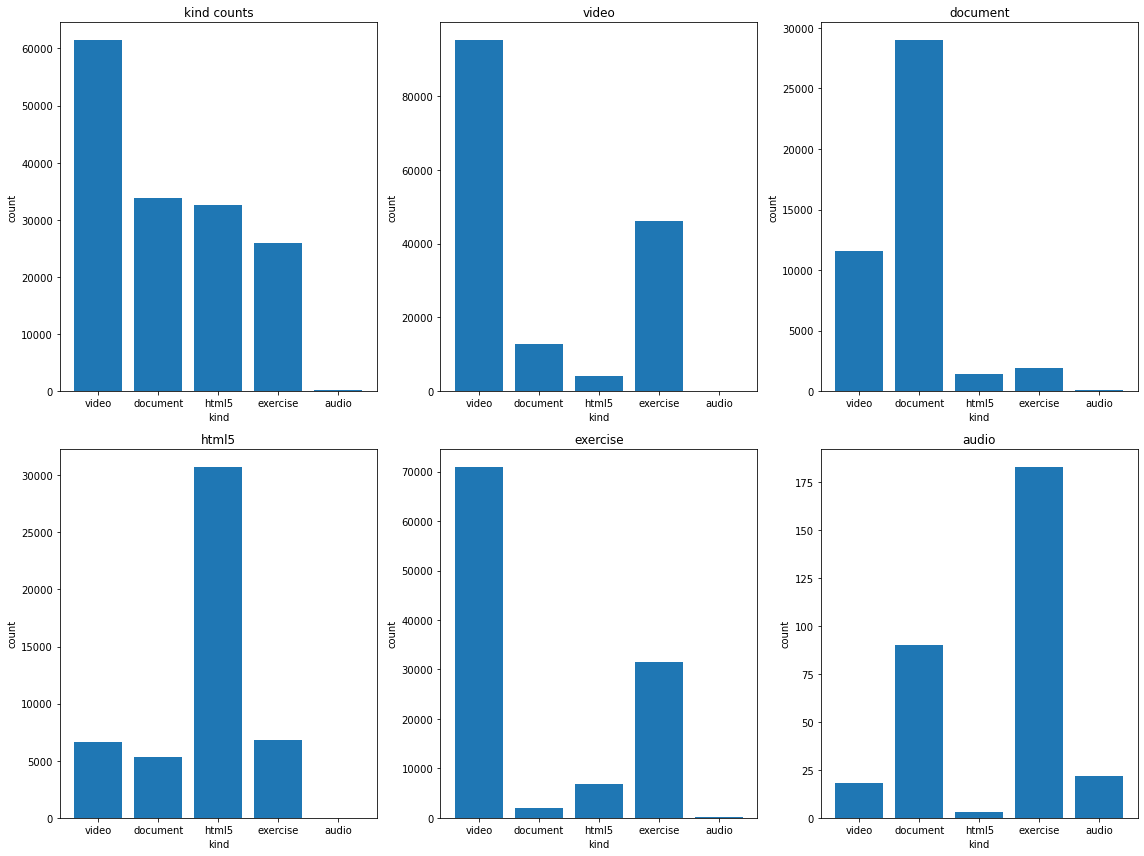

In [19]:
target_content_dist(feature="kind", ncols=3, figsize=(16,12))

In [20]:
#content_ids_len_analysis(feature_name="kind", ncols=5, figsize=(16,6));

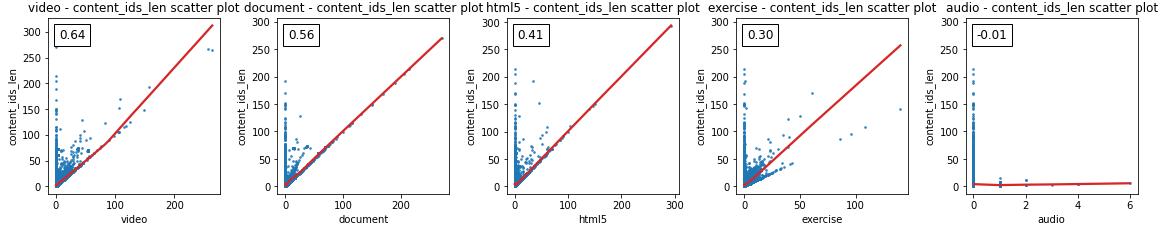

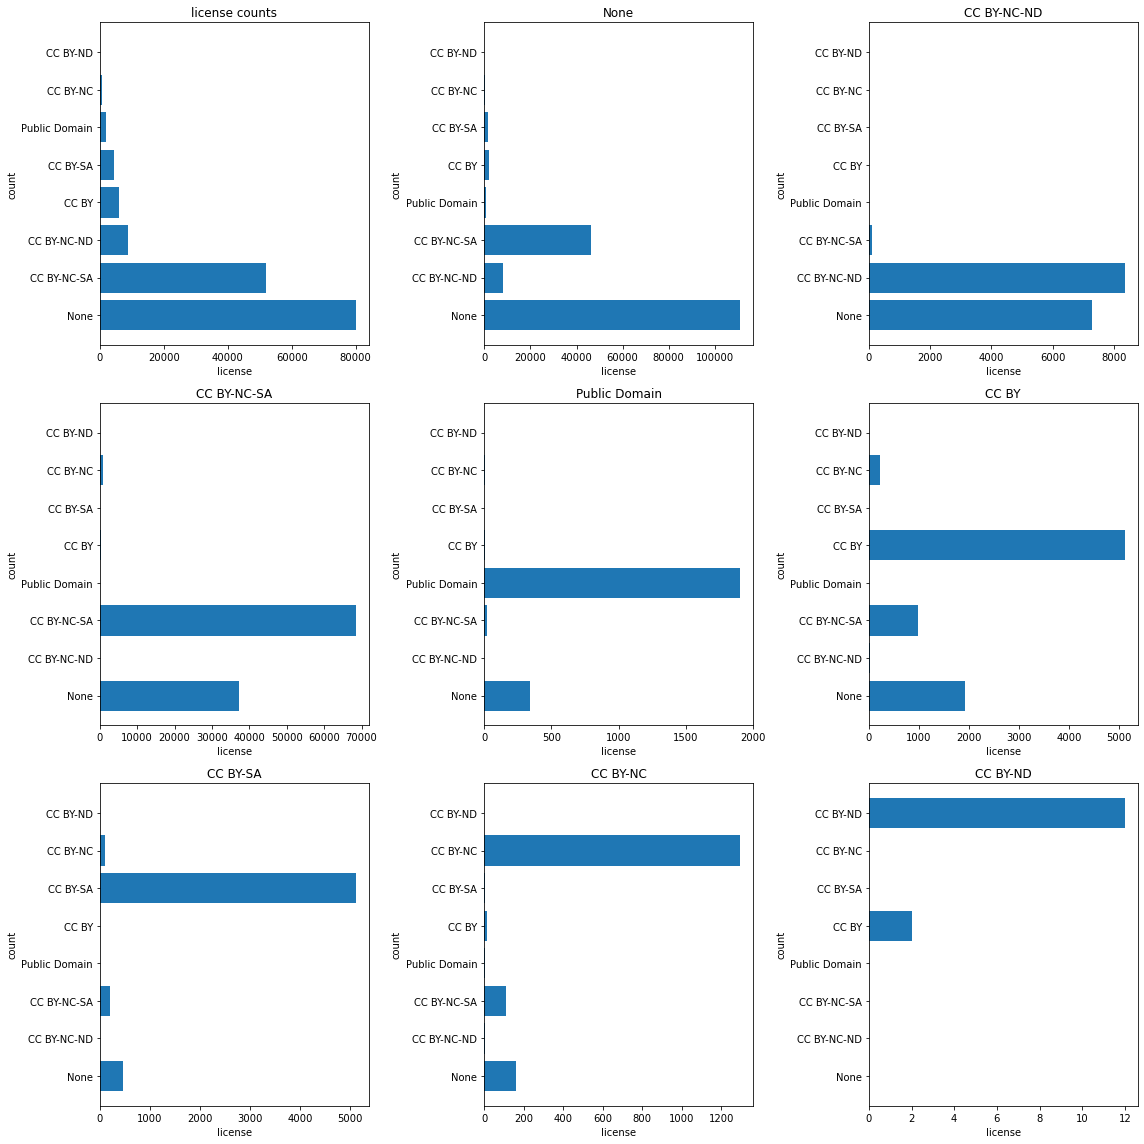

In [21]:
target_content_dist(feature="license", ncols=3, figsize=(16,16), h=True)

In [22]:
#content_ids_len_analysis(feature_name="license", ncols=4, figsize=(16,12));

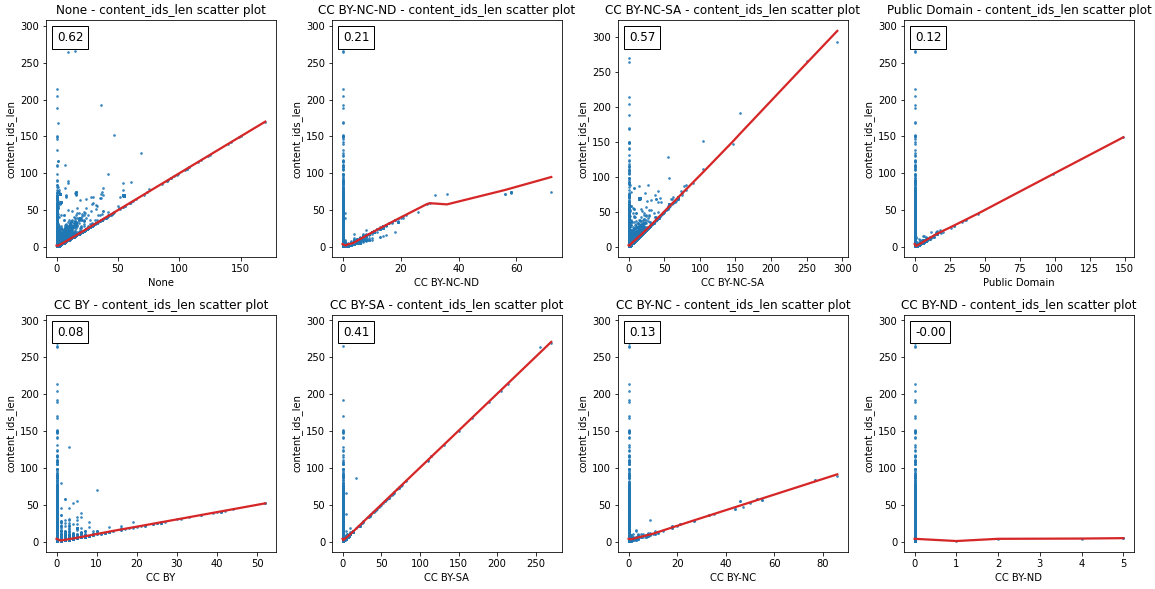

### Content

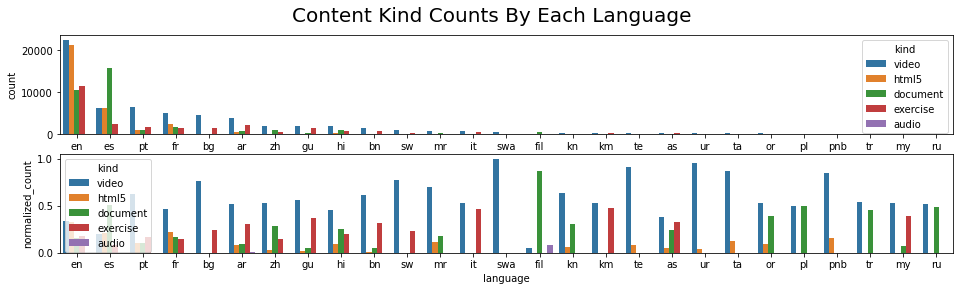

In [23]:
cat_cat_dist(data=content, feat1="language", feat2="kind", title="Content Kind Counts By Each Language")

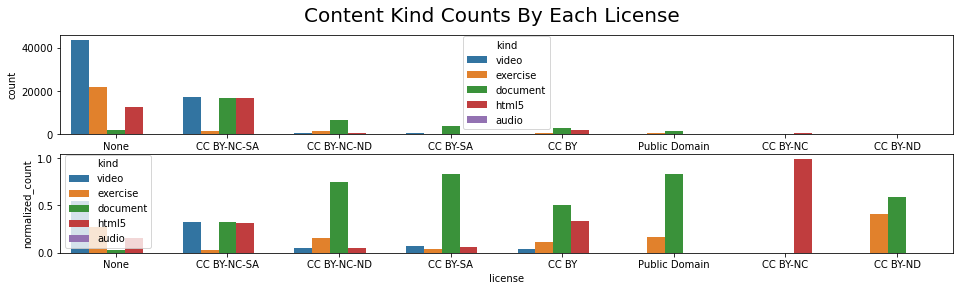

In [24]:
cat_cat_dist(data=content, feat1="license", feat2="kind", title="Content Kind Counts By Each License")

### licenses
* **CC BY-NC-SA:** This license lets others remix, tweak, and build upon your work non-commercially, as long as they credit you and license their new creations under the identical terms.
* **CC BY-NC-ND:** This license is the most restrictive license offered by Creative Commons. With this license, the user (while attributing the original creator) can only share the work but not change it in any way or ever use it commercially.
* **CC BY-SA:** This license allows reusers to distribute, remix, adapt, and build upon the material in any medium or format, so long as attribution is given to the creator. 
* **CC BY:** This license allows reusers to distribute, remix, adapt, and build upon the material in any medium or format, so long as attribution is given to the creator. The license allows for commercial use.
* **Public Domain:** Public-domain-equivalent license are licenses that grant public-domain-like rights and/or act as waivers. They are used to make copyrighted works usable by anyone without conditions, while avoiding the complexities of attribution or license compatibility that occur with other licenses. 
* **CC BY-NC:** This license allows reusers to distribute, remix, adapt, and build upon the material in any medium or format for noncommercial purposes only, and only so long as attribution is given to the creator.
* **CC BY-ND:** This license allows reusers to copy and distribute the material in any medium or format in unadapted form only, and only so long as attribution is given to the creator. The license allows for commercial use. 

**Sources:**
<br> [1]: https://guides.lib.umich.edu/creativecommons/licenses </br>
<br> [2]: https://libguides.hartford.edu/ </br>
<br> [3]: https://creativecommons.org/about/cclicenses/ </br>
<br> [4]: https://en.wikipedia.org/wiki/Public-domain-equivalent_license </br>

In [25]:
licenses_details = {
    "Limitation": {0:"Credit must be given to the creator", 
                  1:"Adaptations must be shared under the same terms", 
                  2:"Only noncommercial uses of the work are permitted",
                  3:"No derivatives or adaptations of the work are permitted"},
    "CC BY": {0:True, 1:False, 2:False, 3:False},
    "CC BY-ND": {0:True, 1:False, 2:False, 3:True},
    "CC BY-SA": {0:True, 1:True, 2:False, 3:False},
    "CC BY-NC": {0:True, 1:False, 2:True, 3:False},
    "CC BY-NC-SA": {0:True, 1:True, 2:True, 3:False},
    "CC BY-NC-ND": {0:True, 1:False, 2:True, 3:True},
    "Public Domain": {0:False, 1:False, 2:False, 3:False}
}

df_licenses_def = pd.DataFrame(licenses_details)
df_licenses_def.set_index("Limitation", inplace=True)
df_licenses_def

,CC BY,CC BY-ND,CC BY-SA,CC BY-NC,CC BY-NC-SA,CC BY-NC-ND,Public Domain
Limitation,,,,,,,
Credit must be given to the creator,True,True,True,True,True,True,False
Adaptations must be shared under the same terms,False,False,True,False,True,False,False
Only noncommercial uses of the work are permitted,False,False,False,True,True,True,False
No derivatives or adaptations of the work are permitted,False,True,False,False,False,True,False


In [26]:
#df_licenses_def.T.to_csv("license_limitations.csv")

In [27]:
#f"<td>{df_licenses_def._repr_html_()}</td> </tr>";

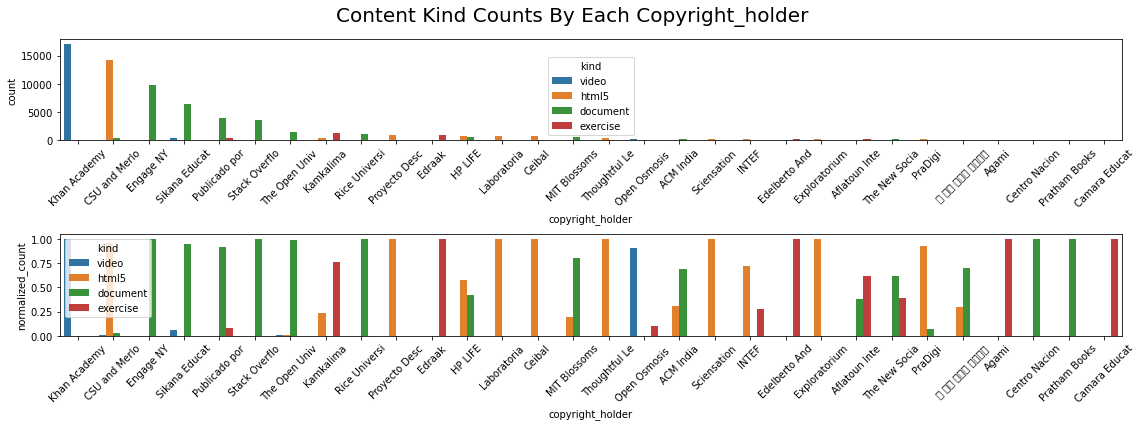

In [28]:
cat_cat_dist(data=content, feat1="copyright_holder", feat2="kind", title="Content Kind Counts By Each Copyright_holder", 
             feat1_lim=30, figsize=(16,6), rotate=True, cut_xlabel=True)

In [29]:
content["title_len"] = content["title"].str.len()
content["description_len"] = content["description"].str.len()
content["text_len"] = content["text"].str.len()

content[["title_len", "description_len", "text_len"]].describe()

,title_len,description_len,text_len
count,154038.000000,89456.000000,74035.000000
mean,33.829782,124.291249,10531.613440
std,18.106550,250.144003,18016.019783
min,1.000000,1.000000,1.000000
25%,21.000000,51.000000,1853.000000
50%,31.000000,82.000000,4486.000000
75%,44.000000,122.000000,10016.000000
max,177.000000,9710.000000,100000.000000


### Topics

In [30]:
topic.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


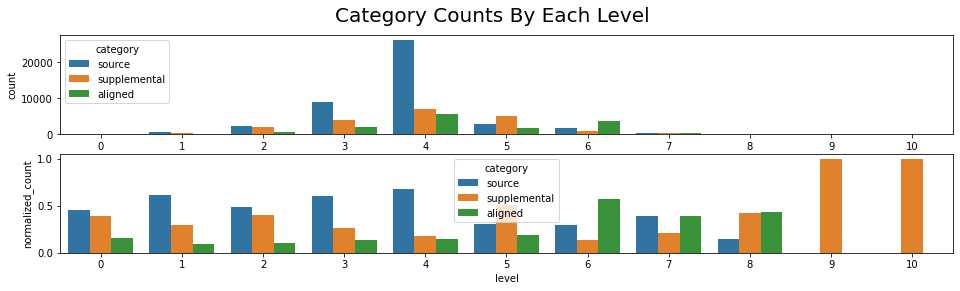

In [31]:
cat_cat_dist(data=topic, feat1="level", feat2="category", title="Category Counts By Each Level")

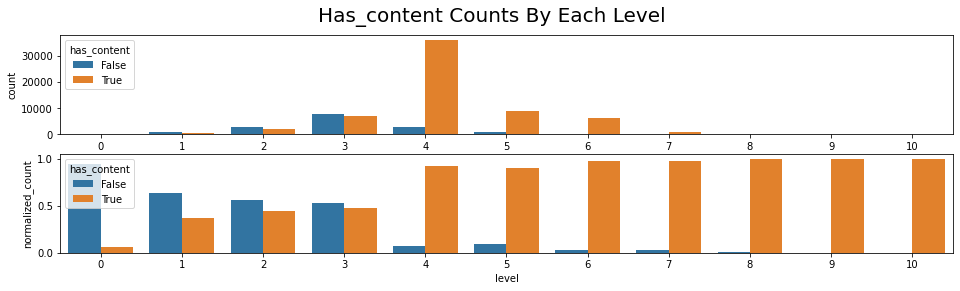

In [32]:
cat_cat_dist(data=topic, feat1="level", feat2="has_content", title="Has_content Counts By Each Level")

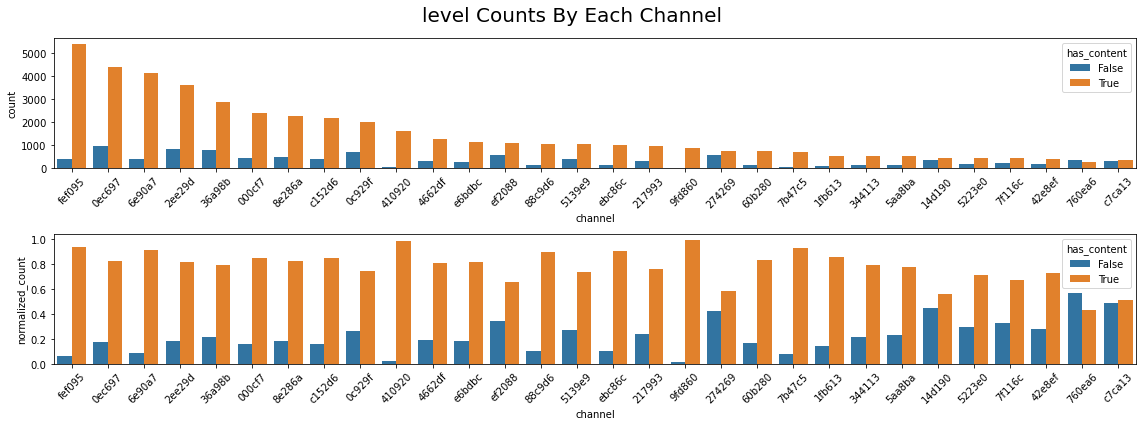

In [33]:
cat_cat_dist(data=topic, feat1="channel", feat2="has_content", title="level Counts By Each Channel",
             feat1_lim=30, figsize=(16,6), rotate=True, cut_xlabel=True)

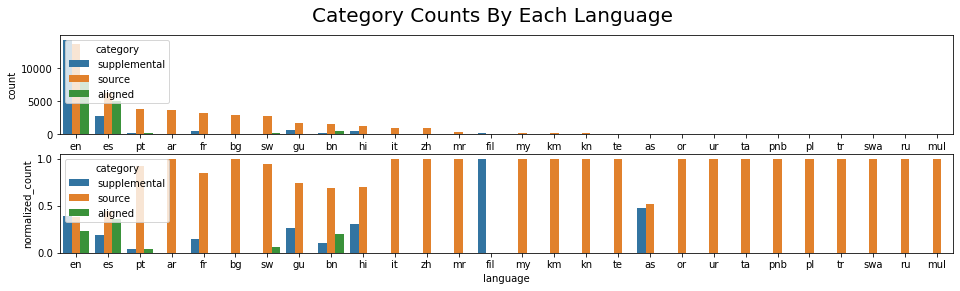

In [34]:
cat_cat_dist(data=topic, feat1="language", feat2="category", title="Category Counts By Each Language")

In [35]:
topic.loc[topic["category"]!="source", "language"].value_counts()

en     22549
es      7733
bn       670
gu       608
fr       552
hi       541
pt       343
fil      247
sw       162
as        80
Name: language, dtype: int64

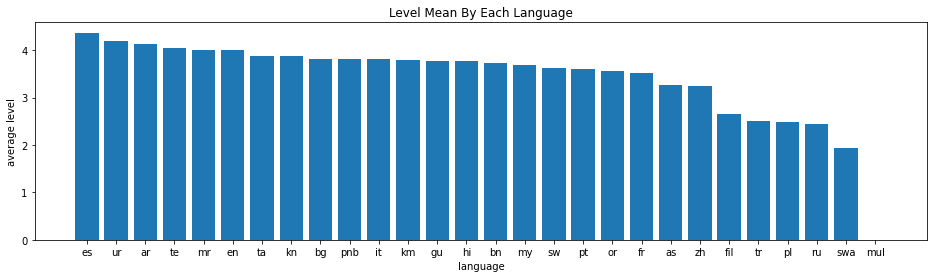

In [36]:
topic_l_l = topic.groupby("language", as_index=False).agg({"level":"mean"})
topic_l_l.sort_values("level", inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(16, 4))
ax.bar(topic_l_l["language"], topic_l_l["level"]);
ax.set_title("Level Mean By Each Language")
ax.set_xlabel("language")
ax.set_ylabel("average level");

In [37]:
topic["title_len"] = topic["title"].str.len()
topic["description_len"] = topic["description"].str.len()

topic[["title_len", "description_len"]].describe()

,title_len,description_len
count,76970.000000,34953.000000
mean,26.780343,180.194118
std,17.413044,239.347045
min,1.000000,1.000000
25%,14.000000,63.000000
50%,23.000000,121.000000
75%,36.000000,226.000000
max,200.000000,4934.000000


## Exploration The Trees

In [38]:
def get_tree_analysis(channel="fef095", language="en", parent=None):
    if parent is not None:
        condition = ((topic["channel"]==channel)&(topic["language"]==language)&(topic["parent"]==parent))
    else:
        condition = ((topic["channel"]==channel)&(topic["language"]==language))
    part_topic = topic.loc[condition, :].copy()
    part_topic = part_topic.merge(correlations, left_on="id", right_on="topic_id")
    part_topic["count"] = 1
    print(10*"-"+ " channel: " + channel + " " + 10*"-")
    print("id nunique: ", part_topic["id"].nunique())
    print("parent nunique: ", part_topic["parent"].nunique())
    
    content_counts = {
        'kind': {'video':0, 
                 'document':0, 
                 'html5':0, 
                 'exercise':0, 
                 'audio':0},
        'license': {"None":0, 
                    'CC BY-NC-ND':0, 
                    'CC BY-NC-SA':0, 
                    'Public Domain':0, 
                    'CC BY':0,
                    'CC BY-SA':0, 
                    'CC BY-NC':0, 
                    'CC BY-ND':0},
        'language': {'es': 0, 'it': 0, 'pt': 0, 'en': 0, 'mr': 0, 'bg': 0, 'gu': 0, 'sw': 0, 'hi': 0,
                     'ar': 0, 'bn': 0, 'as': 0, 'zh': 0, 'fr': 0, 'km': 0, 'pl': 0, 'ta': 0, 'fil': 0,
                     'or': 0, 'ru': 0, 'kn': 0, 'swa': 0, 'my': 0, 'pnb': 0, 'tr': 0, 'te': 0, 'ur': 0},
    }
    for index,row in part_topic.iterrows():
        for content_id in row["content_ids"].split(" "):
            part_content = content.loc[content["id"]==content_id, :]
            part_content.fillna("None", inplace=True)
            content_counts['kind'][part_content["kind"].values[0]] += 1
            content_counts['license'][part_content["license"].values[0]] += 1
            content_counts['language'][part_content["language"].values[0]] += 1
    
    #fig, axes = plt.subplots(5, figsize=(16,16))
    fig = plt.figure(figsize=(16, 6)) # initialize figure
    axes = [None for _ in range(5)] # list to save many ax for setting parameter in each
    axes[0] = plt.subplot2grid((3,4), (0,0), colspan=1)
    axes[1] = plt.subplot2grid((3,4), (0,1), colspan=3)
    axes[2] = plt.subplot2grid((3,4), (1,0), colspan=1)
    axes[3] = plt.subplot2grid((3,4), (1,1), colspan=3)
    axes[4] = plt.subplot2grid((3,4), (2,0), colspan=4)
    
    
    # Category
    part_topic_temp = part_topic.groupby("category", as_index=False).agg({"count":"sum"})
    part_topic_temp.sort_values("count", inplace=True, ascending=False)
    axes[0].bar(part_topic_temp["category"], part_topic_temp["count"]);
    axes[0].set_title("Count By Each Category")
    axes[0].set_xlabel("category")
    axes[0].set_ylabel("count");
    
    # Kind
    content_kind = pd.Series(content_counts["kind"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[1].bar(content_kind.index, content_kind.values);
    axes[1].set_title("Count By Each Kind")
    axes[1].set_xlabel("kind")
    axes[1].set_ylabel("count");
    
    # Level
    part_topic_temp = part_topic.groupby("level", as_index=False).agg({"count":"sum"})
    part_topic_temp.sort_values("count", inplace=True, ascending=False)
    axes[2].bar(part_topic_temp["level"], part_topic_temp["count"]);
    axes[2].set_title("Count By Each Level")
    axes[2].set_xlabel("level")
    axes[2].set_ylabel("count");
    
    # License
    content_kind = pd.Series(content_counts["license"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[3].bar(content_kind.index, content_kind.values);
    axes[3].set_title("Count By Each License")
    axes[3].set_xlabel("license")
    axes[3].set_ylabel("count");
    
    # Language
    content_kind = pd.Series(content_counts["language"])
    content_kind.sort_values(inplace=True, ascending=False)
    axes[4].bar(content_kind.index, content_kind.values);
    axes[4].set_title("Count By Each Language")
    axes[4].set_xlabel("language")
    axes[4].set_ylabel("count");
    
    fig.tight_layout()

---------- channel: af86ca ----------
id nunique:  5
parent nunique:  1


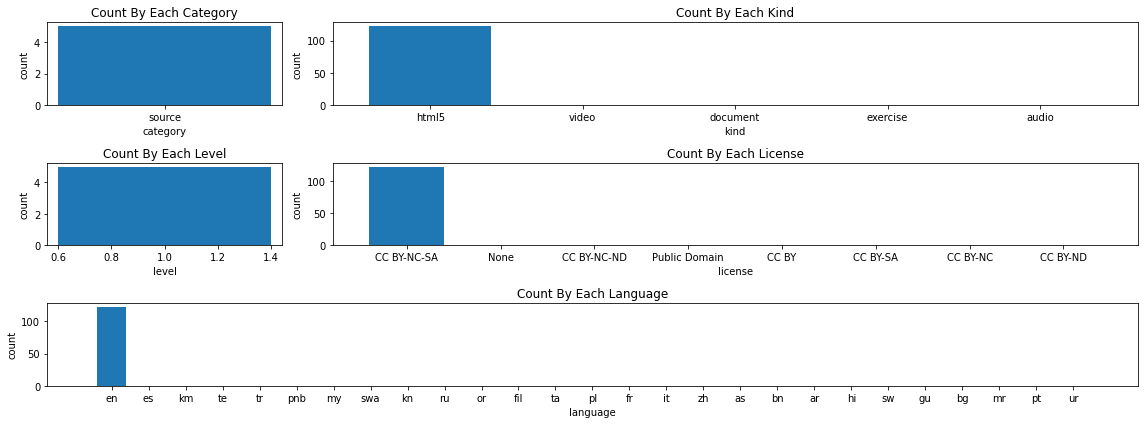

In [39]:
get_tree_analysis(channel="af86ca", language="en")

---------- channel: fef095 ----------
id nunique:  112
parent nunique:  1


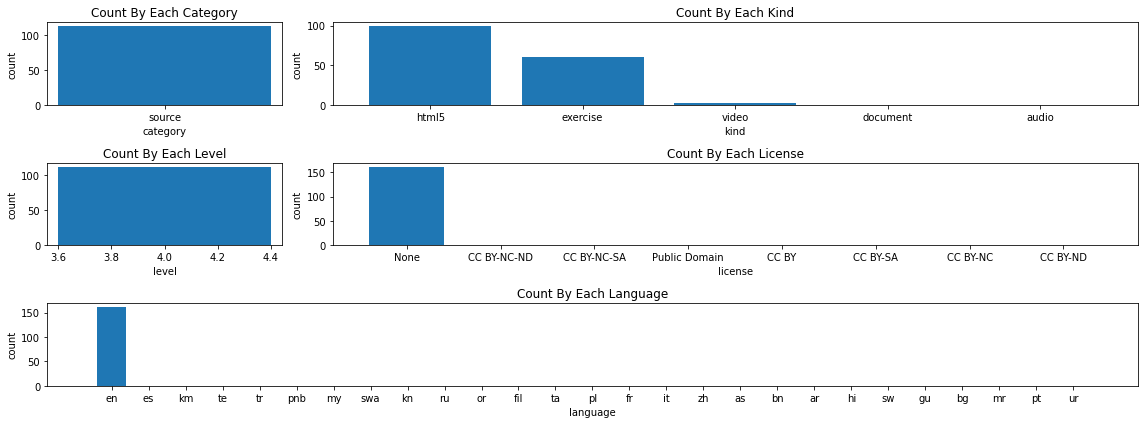

In [40]:
get_tree_analysis(channel="fef095", language="en", parent="t_009fc1677c8e")

---------- channel: fef095 ----------
id nunique:  5394
parent nunique:  308


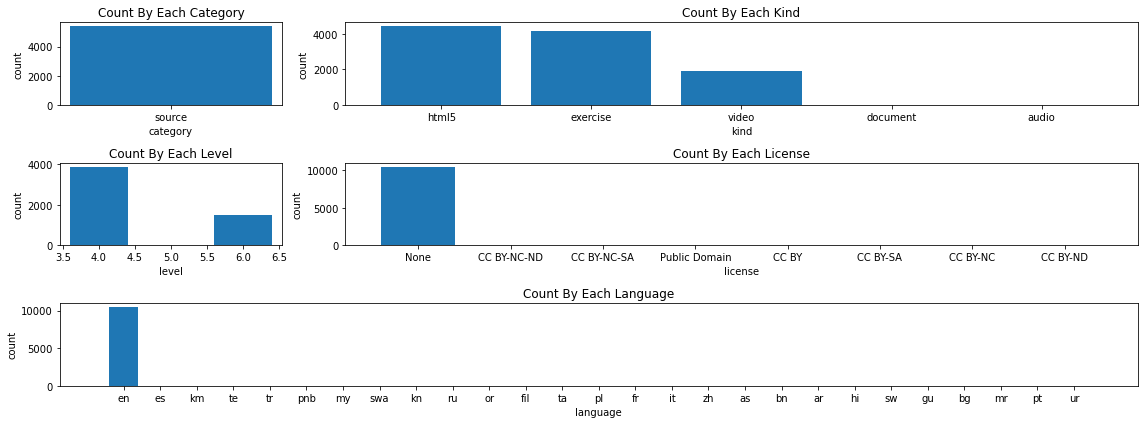

In [41]:
%%time
get_tree_analysis(channel="fef095", language="en", parent=None)

## F2 Metric Analysis

β = 1 (F1-Score)

β = 2 (F2-Score)

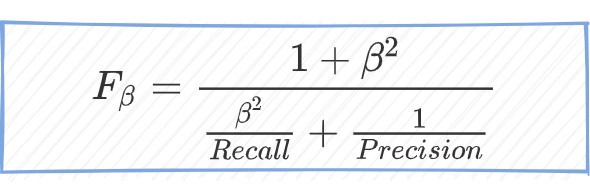

ref: https://towardsdatascience.com/is-f1-the-appropriate-criterion-to-use-what-about-f2-f3-f-beta-4bd8ef17e285

In [42]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

SAMPLE_NUM = 1000
y_true = list(np.random.choice([0, 1], SAMPLE_NUM-2, p=[0.75, 0.25]))
y_true.extend([0, 1])
y_pred_zero = list(np.zeros(SAMPLE_NUM-2).astype(int))
y_pred_zero.extend([1, 1])
y_pred_one = list(np.ones(SAMPLE_NUM-2).astype(int))
y_pred_one.extend([0, 0])

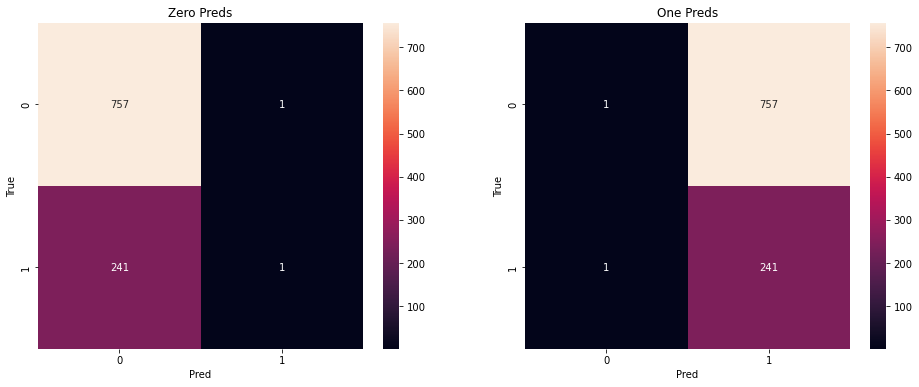

In [43]:
confusion_matrix_zero = confusion_matrix(y_true, y_pred_zero)
confusion_matrix_one = confusion_matrix(y_true, y_pred_one)

fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(confusion_matrix_zero, annot=True, ax=axes[0], fmt="g")
sns.heatmap(confusion_matrix_one, annot=True, ax=axes[1], fmt="g")
axes[0].set_title("Zero Preds")
axes[0].set_xlabel("Pred")
axes[0].set_ylabel("True")
axes[1].set_title("One Preds");
axes[1].set_xlabel("Pred")
axes[1].set_ylabel("True");

In [44]:
f1_score_zero = fbeta_score(y_true, y_pred_zero, beta=1)
f2_score_zero = fbeta_score(y_true, y_pred_zero, beta=2)
recall_score_zero = recall_score(y_true, y_pred_zero)
precision_score_zero = precision_score(y_true, y_pred_zero)

f1_score_one = fbeta_score(y_true, y_pred_one, beta=1)
f2_score_one = fbeta_score(y_true, y_pred_one, beta=2)
recall_score_one = recall_score(y_true, y_pred_one)
precision_score_one = precision_score(y_true, y_pred_one)

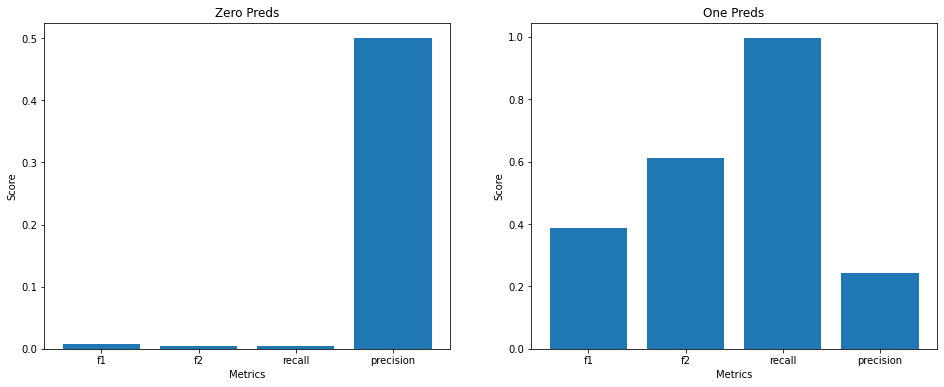

In [45]:
x_labels = ["f1", "f2", "recall", "precision"]
fig, axes = plt.subplots(1, 2, figsize=(16,6))
axes[0].bar(x_labels, [f1_score_zero, f2_score_zero, recall_score_zero, precision_score_zero])
axes[1].bar(x_labels, [f1_score_one, f2_score_one, recall_score_one, precision_score_one])
axes[0].set_title("Zero Preds")
axes[0].set_xlabel("Metrics")
axes[0].set_ylabel("Score")
axes[1].set_title("One Preds");
axes[1].set_xlabel("Metrics")
axes[1].set_ylabel("Score");

## Feature Engineering

In [46]:
import spacy

In [ ]:
!python -m spacy download es_core_news_sm
!python -m spacy download fr_core_news_sm
!python -m spacy download pt_core_news_sm
!python -m spacy download zh_core_web_sm
!python -m spacy download it_core_news_sm
!python -m spacy download pl_core_news_sm
!python -m spacy download ru_core_news_sm
!python -m spacy download xx_ent_wiki_sm

In [47]:
def add_spacy_features():
    
#     !python -m spacy download es_core_news_sm
#     !python -m spacy download fr_core_news_sm
#     !python -m spacy download pt_core_news_sm
#     !python -m spacy download zh_core_web_sm
#     !python -m spacy download it_core_news_sm
#     !python -m spacy download pl_core_news_sm
#     !python -m spacy download ru_core_news_sm
#     !python -m spacy download xx_ent_wiki_sm
    
    spacy_language_map = {
        "en":"en_core_web_sm",
        "es":"es_core_news_sm",
        "fr":"fr_core_news_sm",
        "pt":"pt_core_news_sm",
        "ar":"",
        "bg":"",
        "hi":"",
        "zh":"zh_core_web_sm",
        "gu":"",
        "bn":"",
        "sw":"",
        "it":"it_core_news_sm",
        "mr":"",
        "as":"",
        "fil":"",
        "km":"",
        "kn":"",
        "swa":"",
        "or":"",
        "pl":"pl_core_news_sm",
        "te":"",
        "ur":"",
        "tr":"",
        "ta":"",
        "my":"",
        "ru":"ru_core_news_sm",
        "pnb":"",
        "mul":"xx_ent_wiki_sm"
    }
    
    # content
    df_content_list = []
    for language, content_lan in content.groupby("language"):
        if spacy_language_map[language] == "":
            continue
        nlp = spacy.load(spacy_language_map[language])

        df_content = pd.DataFrame()
        df_content["id"] = ''
        df_content["title_POS"] = ''
        df_content["title_LEMMA"] = ''
        df_content["title_LABEL"] = ''
        df_content["description_POS"] = ''
        df_content["description_LEMMA"] = ''
        df_content["description_LABEL"] = ''
        for index, text in content_lan[['id', 'title', 'description', 'text']].iterrows():
            if type(text["title"]) == type(""):
                pos = get_pos(text["title"], model=nlp)
                lemma = get_lemma(text["title"], model=nlp)
                label = get_label(text["title"], model=nlp)

                df_content.loc[index, 'id'] = text["id"]
                df_content.loc[index, 'title_POS'] = ' '.join(pos)
                df_content.loc[index, 'title_LEMMA'] = ' '.join(lemma)
                df_content.loc[index, 'title_LABEL'] = ' '.join(label)

            if type(text["description"]) == type(""):
                pos = get_pos(text["description"], model=nlp)
                lemma = get_lemma(text["description"], model=nlp)
                label = get_label(text["description"], model=nlp)

                df_content.loc[index, 'description_POS'] = ' '.join(pos)
                df_content.loc[index, 'description_LEMMA'] = ' '.join(lemma)
                df_content.loc[index, 'description_LABEL'] = ' '.join(label)

        df_content["language"] = language
        df_content_list.append(df_content)
    df_content_all = pd.concat(df_content_list)
    df_content_all.to_csv("content_advanced.csv", index=False)
    
    # topics
    df_topic_list = []
    for language, topic_lan in topic.groupby("language"):
        if spacy_language_map[language] == "":
            continue
        nlp = spacy.load(spacy_language_map[language])

        df_topic = pd.DataFrame()
        df_topic["id"] = ''
        df_topic["title_POS"] = ''
        df_topic["title_LEMMA"] = ''
        df_topic["title_LABEL"] = ''
        df_topic["description_POS"] = ''
        df_topic["description_LEMMA"] = ''
        df_topic["description_LABEL"] = ''
        for index, text in topic_lan[['id', 'title', 'description']].iterrows():
            if type(text["title"]) == type(""):
                pos = get_pos(text["title"], model=nlp)
                lemma = get_lemma(text["title"], model=nlp)
                label = get_label(text["title"], model=nlp)

                df_topic.loc[index, 'id'] = text["id"]
                df_topic.loc[index, 'title_POS'] = ' '.join(pos)
                df_topic.loc[index, 'title_LEMMA'] = ' '.join(lemma)
                df_topic.loc[index, 'title_LABEL'] = ' '.join(label)

            if type(text["description"]) == type(""):
                pos = get_pos(text["description"], model=nlp)
                lemma = get_lemma(text["description"], model=nlp)
                label = get_label(text["description"], model=nlp)

                df_topic.loc[index, 'description_POS'] = ' '.join(pos)
                df_topic.loc[index, 'description_LEMMA'] = ' '.join(lemma)
                df_topic.loc[index, 'description_LABEL'] = ' '.join(label)

        df_topic["language"] = language
        df_topic_list.append(df_topic)
    df_topic_all = pd.concat(df_topic_list)
    df_topic_all.to_csv("topics_advanced.csv", index=False)

In [48]:
# I'm just guessing here that this needs to be run ...
# DAMMIT! ... Why are the spacy models downloaded every time I run this notebook!?
add_spacy_features()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 792.8 kB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 200.1 kB/s eta 0:00:0000:0100:03
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 949.0 kB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 MB 1.0 MB/s eta 0:00:0000:0100:02m
✔ Download and installation successful
You can now load the package via spacy.load('zh_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 1.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

NameError: name 'get_pos' is not defined

In [50]:
model = spacy.load("en_core_web_sm")
model._path

PosixPath('/opt/conda/lib/python3.7/site-packages/en_core_web_sm/en_core_web_sm-3.3.0')

In [ ]:
# content_advanced = pd.read_csv("/kaggle/input/learningequality-advanceddataset/content_advanced.csv")
# topics_advanced = pd.read_csv("/kaggle/input/learningequality-advanceddataset/topics_advanced.csv")
# license_limitations = pd.read_csv("/kaggle/input/learningequality-advanceddataset/license_limitations.csv")
content_advanced = pd.read_csv("data/content_advanced.csv")
topics_advanced = pd.read_csv("data/topics_advanced.csv")
license_limitations = pd.read_csv("data/license_limitations.csv")

display(content_advanced.head())
display(topics_advanced.head())

In [ ]:
license_limitations

In [ ]:
print("content_advanced shape:", content_advanced.shape)
print("topics_advanced shape:", topics_advanced.shape)

In [ ]:
print("content_advanced nan value sum:", content_advanced.isna().sum().sum())
print("topics_advanced nan value sum:", topics_advanced.isna().sum().sum())

# Validation

In [ ]:
BASE_DIR = "/kaggle/input/learning-equality-curriculum-recommendations/"
content = pd.read_csv(BASE_DIR+"content.csv")
correlations = pd.read_csv(BASE_DIR+"correlations.csv")
topic = pd.read_csv(BASE_DIR+"topics.csv")
sub = pd.read_csv(BASE_DIR+"sample_submission.csv")

content = content.merge(license_limitations, on="license", how="left")
content["license_nan"] = content["license"].isna()
gc.collect()

In [ ]:
license_cols = ["license_nan", "Credit must be given to the creator", "Adaptations must be shared under the same terms", 
                "Only noncommercial uses of the work are permitted", "No derivatives or adaptations of the work are permitted"]
content[["title", "description", "text"]] = content[["title", "description", "text"]].fillna("")
content[license_cols] = content[license_cols].fillna(False)
topic[["title", "description"]] = topic[["title", "description"]].fillna("")

advanced_cols = ['title_POS', 'title_LEMMA', 'title_LABEL', 'description_POS',
                 'description_LEMMA', 'description_LABEL']
content_advanced[advanced_cols] = content_advanced[advanced_cols].fillna("")
topics_advanced[advanced_cols] = topics_advanced[advanced_cols].fillna("")

topic["merged_text"] = topic['title']+', '+topic['description']
content["merged_text"] = content['title']+', '+content['description']

## Sklearn

In [ ]:
!pip install kneed

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

In [ ]:
def pairwise_distances_on_batch(topic, content, metric='cosine', n_jobs=-1, batch_size=1000, n_rec=5):
    cos_dist_list = []
    for i in range(int(topic.shape[0] / batch_size)+1):
        cos_dist_part = pairwise_distances(topic[i*batch_size:i*batch_size+batch_size], 
                                           content, metric=metric, n_jobs=n_jobs)
        cos_dist_part = cos_dist_part.argsort(axis=1)
        print(f"X_topic_nmf_part.shape: {topic[i*batch_size:i*batch_size+batch_size].shape} - cos_dist_part.shape: {cos_dist_part[:, :n_rec].shape}")
        cos_dist_list.append(cos_dist_part[:, :n_rec])
        del cos_dist_part
        gc.collect()
    cos_dist = np.vstack(tuple(cos_dist_list))
    return cos_dist

def get_sklearn_baseline_preds(advanced_feat=True, drop_source=False, drop_copyright_holder=False, 
                      tree_coef=1.0, kind_coef=1.0, n_rec=100):    
    topics_advanced_lan_unique = topics_advanced["language"].unique()
    all_preds_list = []
    for language, group in topic.groupby("language"):
        print("language: ", language)
        if language == "mul":
            continue
            
        if language in topics_advanced_lan_unique and advanced_feat:
            content_advanced_part = content_advanced.loc[content["language"]==language,:]
            topics_advanced_part = topics_advanced.loc[topic["language"]==language,:]
            content_advanced_part.reset_index(inplace=True, drop=True)
            topics_advanced_part.reset_index(inplace=True, drop=True)
            
            topics_advanced_part["merged_text_LEMMA"] = topics_advanced['title_LEMMA']+', '+topics_advanced['description_LEMMA']
            topics_advanced_part["merged_text_LABEL"] = topics_advanced['title_LABEL']+', '+topics_advanced['description_LABEL']
            content_advanced_part["merged_text_LEMMA"] = content_advanced['title_LEMMA']+', '+content_advanced['description_LEMMA']
            content_advanced_part["merged_text_LABEL"] = content_advanced['title_LABEL']+', '+content_advanced['description_LABEL']
            
            vectorizer_lemma = TfidfVectorizer(max_features=10000)
            X_topic_lemma = vectorizer_lemma.fit_transform(topics_advanced_part["merged_text_LEMMA"]).toarray()
            X_content_lemma = vectorizer_lemma.transform(content_advanced_part["merged_text_LEMMA"]).toarray()
            print(f"X_content_lemma.shape: {X_content_lemma.shape} - X_topic_lemma.shape: {X_topic_lemma.shape}")
            
            vectorizer_label = TfidfVectorizer(max_features=500)
            X_topic_label = vectorizer_label.fit_transform(topics_advanced_part["merged_text_LABEL"]).toarray() * 10
            X_content_label = vectorizer_label.transform(content_advanced_part["merged_text_LABEL"]).toarray() * 10
            print(f"X_content_label.shape: {X_content_label.shape} - X_content_label.shape: {X_topic_label.shape}")
            
            X_topic = np.hstack((X_topic_lemma, X_topic_label))
            X_content = np.hstack((X_content_lemma, X_content_label))
            print(f"X_content.shape: {X_content.shape} - X_topic.shape: {X_topic.shape}")
            
            del X_topic_lemma, X_content_lemma, X_topic_label, X_content_label
            gc.collect()
            
            nmf_model = NMF(n_components=61)
            X_topic_nmf = nmf_model.fit_transform(X_topic)
            X_content_nmf = nmf_model.transform(X_content)
            print(f"X_content_nmf.shape: {X_content_nmf.shape} - X_topic_nmf.shape: {X_topic_nmf.shape}")

            del X_content, X_topic, nmf_model, vectorizer_lemma, vectorizer_label
            gc.collect()

            if X_topic_nmf.shape[0] > 4000:
                cos_dist = pairwise_distances_on_batch(X_topic_nmf, X_content_nmf, metric='cosine', 
                                                        n_jobs=-1, batch_size=4000, n_rec=n_rec)
            else: 
                cos_dist = pairwise_distances(X_topic_nmf, X_content_nmf, metric='cosine', n_jobs=-1)
                cos_dist = cos_dist.argsort(axis=1)
            print(f"cos_dist.shape: {cos_dist.shape}")
            df_preds = pd.DataFrame(columns=["topic_id", "content_ids"])
            for row_index in range(cos_dist.shape[0]):
                df_pred = content_advanced_part.loc[cos_dist[row_index], :]
                df_pred.dropna(inplace=True)
                df_pred.reset_index(inplace=True, drop=True)

                df_pred = df_pred.loc[:n_rec-1, :]
                preds = df_pred["id"].values
                
                preds_dict = {
                    "topic_id":topics_advanced_part.loc[row_index,"id"],
                    "content_ids":' '.join(list(preds))
                }
                df_preds = df_preds.append(preds_dict,ignore_index=True)

                del df_pred, preds, preds_dict
                gc.collect()

            all_preds_list.append(df_preds)
            del cos_dist, df_preds, content_advanced_part, topics_advanced_part
            gc.collect()
            
        else:
            content_part = content.loc[content["language"]==language,:]
            topic_part = topic.loc[topic["language"]==language,:]

            if drop_source:
                topic_part.loc[topic_part["category"]!="source",:]
            if drop_copyright_holder:
                content_part.loc[content_part["copyright_holder"]!=True,:]

            content_part.reset_index(inplace=True, drop=True)
            topic_part.reset_index(inplace=True, drop=True)
            
            vectorizer = TfidfVectorizer(max_features=10000)
            X_topic = vectorizer.fit_transform(topic_part["merged_text"]).toarray()
            X_content = vectorizer.transform(content_part["merged_text"]).toarray()
            print(f"X_content.shape: {X_content.shape} - X_topic.shape: {X_topic.shape}")
        
            nmf_model = NMF(n_components=61)
            X_topic_nmf = nmf_model.fit_transform(X_topic)
            X_content_nmf = nmf_model.transform(X_content)
            print(f"X_content_nmf.shape: {X_content_nmf.shape} - X_topic_nmf.shape: {X_topic_nmf.shape}")

            del X_content, X_topic, nmf_model, vectorizer
            gc.collect()

            if X_topic_nmf.shape[0] > 4000:
                cos_dist = pairwise_distances_on_batch(X_topic_nmf, X_content_nmf, metric='cosine', 
                                                        n_jobs=-1, batch_size=4000, n_rec=n_rec)
            else: 
                cos_dist = pairwise_distances(X_topic_nmf, X_content_nmf, metric='cosine', n_jobs=-1)
                cos_dist = cos_dist.argsort(axis=1)
            print(f"cos_dist.shape: {cos_dist.shape}")
            df_preds = pd.DataFrame(columns=["topic_id", "content_ids"])
            for row_index in range(cos_dist.shape[0]):
                df_pred = content_part.loc[cos_dist[row_index], :]
                df_pred.dropna(inplace=True)
                df_pred.reset_index(inplace=True, drop=True)

                df_pred = df_pred.loc[:n_rec-1, :]
                preds = df_pred["id"].values

                preds_dict = {
                    "topic_id":topic_part.loc[row_index,"id"],
                    "content_ids":' '.join(list(preds))
                }
                df_preds = df_preds.append(preds_dict,ignore_index=True)

                del df_pred, preds, preds_dict
                gc.collect()

            all_preds_list.append(df_preds)
            del cos_dist, df_preds, content_part, topic_part
            gc.collect()
        
    return pd.concat(all_preds_list)

In [ ]:
def find_best_n_component():      
    from tqdm import tqdm
    from kneed import KneeLocator
    
    content_part = content.loc[content["language"]=="en",:]
    topic_part = topic.loc[topic["language"]=="en",:]
            
    content_part.reset_index(inplace=True, drop=True)
    topic_part.reset_index(inplace=True, drop=True)
        
    vectorizer = TfidfVectorizer(max_features=20000)
    X_topic = vectorizer.fit_transform(topic_part["merged_text"]).toarray()
    X_content = vectorizer.transform(content_part["merged_text"]).toarray()
    print(f"X_content.shape: {X_content.shape} - X_topic.shape: {X_topic.shape}")
    
    pca_model = PCA(n_components=1000)
    pca_model.fit(X_topic)
    
    kn = KneeLocator(np.arange(0, len(pca_model.explained_variance_ratio_)),
                 pca_model.explained_variance_ratio_, curve='convex', direction='decreasing')
    
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(np.arange(0, len(pca_model.explained_variance_ratio_)), pca_model.explained_variance_ratio_)
    ax.set_xlabel('N_Component')
    ax.set_ylabel('Explained Variance Ratio')
    ax.axvline(kn.knee+1, color="red", linestyle="--")
    ax.text(kn.knee+1, 0.01, s=f"n_component={kn.knee+1}")
    plt.show()
    
    del content_part, topic_part, vectorizer, X_topic, X_content
    gc.collect()
    
def get_f2_score(df_true, df_pred, n_rec=5):
    df_true_pred = df_true.merge(df_pred, on="topic_id", how="left", suffixes=["_true", "_pred"])
    df_true_pred.fillna("c_dd739e116435", inplace=True)
    df_true_pred.head()
    
    f2_scores = np.zeros(len(df_true_pred))
    for index, row in df_true_pred.iterrows():
        true_ids = row["content_ids_true"].split(" ")
        pred_ids = row["content_ids_pred"].split(" ")
        pred_ids = pred_ids[:n_rec]
        
        true_positives = len(set(true_ids).intersection(set(pred_ids)))
        false_positives = len(set(pred_ids)-set(true_ids))
        false_negatives = len(set(true_ids)-set(pred_ids))

        beta = 2
        f2_score = ((1+beta**2)*true_positives)/((1+beta**2)*true_positives + beta**2*false_negatives + false_positives)
        f2_scores[index]=f2_score
    
    return f2_scores.mean()

In [ ]:
find_best_n_component()

In [ ]:
#train_baseline_preds = get_sklearn_baseline_preds(advanced_feat=False)
#train_baseline_preds.to_csv("train_baseline_preds.csv", index=False)

train_baseline_preds = pd.read_csv("/kaggle/input/learningequality-advanceddataset/train_preds/train_baseline_preds.csv")
train_baseline_preds.head()

In [ ]:
f2_scores = []
for i in range(1, 101):
    f2_score = get_f2_score(correlations, train_baseline_preds, n_rec=i)
    f2_scores.append(f2_score)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(np.arange(1, 101), f2_scores)
ax.set_ylabel("F2 Score")
ax.set_xlabel("Rec Number")
ax.set_title("Sklearn Baseline Scores");

In [ ]:
#train_baseline_advanced_preds = get_sklearn_baseline_preds(advanced_feat=True)
#train_baseline_advanced_preds.to_csv("train_baseline_advanced_preds.csv", index=False)

train_baseline_advanced_preds = pd.read_csv("/kaggle/input/learningequality-advanceddataset/train_preds/train_baseline_advanced_preds.csv")
train_baseline_advanced_preds.head()

In [ ]:
f2_scores_advanced = []
for i in range(1, 101):
    f2_score = get_f2_score(correlations, train_baseline_advanced_preds, n_rec=i)
    f2_scores_advanced.append(f2_score)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(np.arange(1, 101), f2_scores_advanced)
ax.set_ylabel("F2 Score")
ax.set_xlabel("Rec Number")
ax.set_title("Sklearn Advanced Baseline Scores");

## Transformers

In [ ]:
import transformers
from transformers import BertTokenizer, TFBertModel, BertModel
from transformers import AutoTokenizer, AutoModel
import torch
from tqdm import tqdm

In [ ]:
tokenizer_word = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
tokenizer_sentence = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

model_word = BertModel.from_pretrained("bert-base-multilingual-cased")
model_sentence = AutoModel.from_pretrained("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

In [ ]:
texts = ['This is an example sentence', 'Each sentence is converted']

encoded_input_word = tokenizer_word(texts, padding=True, truncation=True, return_tensors='pt') # return_tensors='tf' for TensorFlow, return_tensors='pt' for PyTorch
encoded_input_sentence = tokenizer_sentence(texts, padding=True, truncation=True, return_tensors='pt')

encoded_input_word

In [ ]:
model_output_word = model_word(
    encoded_input_word["input_ids"], 
    attention_mask=encoded_input_word["attention_mask"]
    ).last_hidden_state.mean(1)
model_output_word, model_output_word.shape

In [ ]:
model_output_sentence = model_sentence(
    encoded_input_sentence["input_ids"], 
    attention_mask=encoded_input_sentence["attention_mask"]
    ).last_hidden_state.mean(1)
model_output_sentence, model_output_sentence.shape

In [ ]:
del tokenizer_word, tokenizer_sentence, model_word, model_sentence
gc.collect()

In [ ]:
def embedding_on_batch(texts, model, batch_size=500):
    embedding_list = []
    for i in range(int(texts["input_ids"].shape[0] / batch_size)+1):
        with torch.no_grad():
            embedding_part = model(
                    texts["input_ids"][i*batch_size:i*batch_size+batch_size], 
                    attention_mask=texts["attention_mask"][i*batch_size:i*batch_size+batch_size]
                ).last_hidden_state.mean(1)
            print(f"embedding_part.shape: {embedding_part.shape}")
            embedding_list.append(embedding_part.detach().numpy())
            del embedding_part
            gc.collect()
    embedding = np.vstack(tuple(embedding_list))
    return embedding

def get_transformer_preds(model_name="word", drop_source=False, drop_copyright_holder=False, n_rec=100):
    MAX_LENGTH = 64
    
    if model_name == "word":
        tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
        model = BertModel.from_pretrained("bert-base-multilingual-cased")
    elif model_name == "sentence":
        tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
        model = transformers.AutoModel.from_pretrained("sentence-transformers/paraphrase-multilingual-mpnet-base-v2", trainable=False)
        for layer in model.layers:
            layer.trainable=False
            for w in layer.weights: w._trainable=False
    
    all_preds_list = []
    for language, group in topic.groupby("language"):
        print("language: ", language)
        if language == "mul":
            continue
        
        content_part = content.loc[content["language"]==language,:]
        topic_part = topic.loc[topic["language"]==language,:]
        
        if drop_source:
            topic_part.loc[topic_part["category"]!="source",:]
        if drop_copyright_holder:
            content_part.loc[content_part["copyright_holder"]!=True,:]
            
        content_part.reset_index(inplace=True, drop=True)
        topic_part.reset_index(inplace=True, drop=True)
        
        X_token_topic = tokenizer(list(topic_part["merged_text"].values), padding="max_length", 
                                  truncation=True, return_tensors='pt', max_length=MAX_LENGTH)
        X_token_content = tokenizer(list(content_part["merged_text"].values), padding="max_length", 
                                    truncation=True, return_tensors='pt', max_length=MAX_LENGTH)
        print(f"X_token_topic.shape: {X_token_topic['input_ids'].shape} - X_token_content.shape: {X_token_content['input_ids'].shape}")
        
        del topic_part, content_part
        gc.collect()
        
        X_embedding_topic = embedding_on_batch(X_token_topic, model, batch_size=4000)
        X_embedding_content = embedding_on_batch(X_token_content, model, batch_size=4000)
        print(f"X_embedding_topic.shape: {X_embedding_topic.shape} - X_embedding_content.shape: {X_embedding_content.shape}")
        
        del X_token_topic, X_token_content
        gc.collect()
        
        cos_dist = pairwise_distances_on_batch(X_embedding_topic, X_embedding_content, metric='cosine', 
                                                        n_jobs=-1, batch_size=4000, n_rec=n_rec)
        
        break

In [ ]:
#get_transformer_preds(model_name="word")

# Modeling

# Working Progress

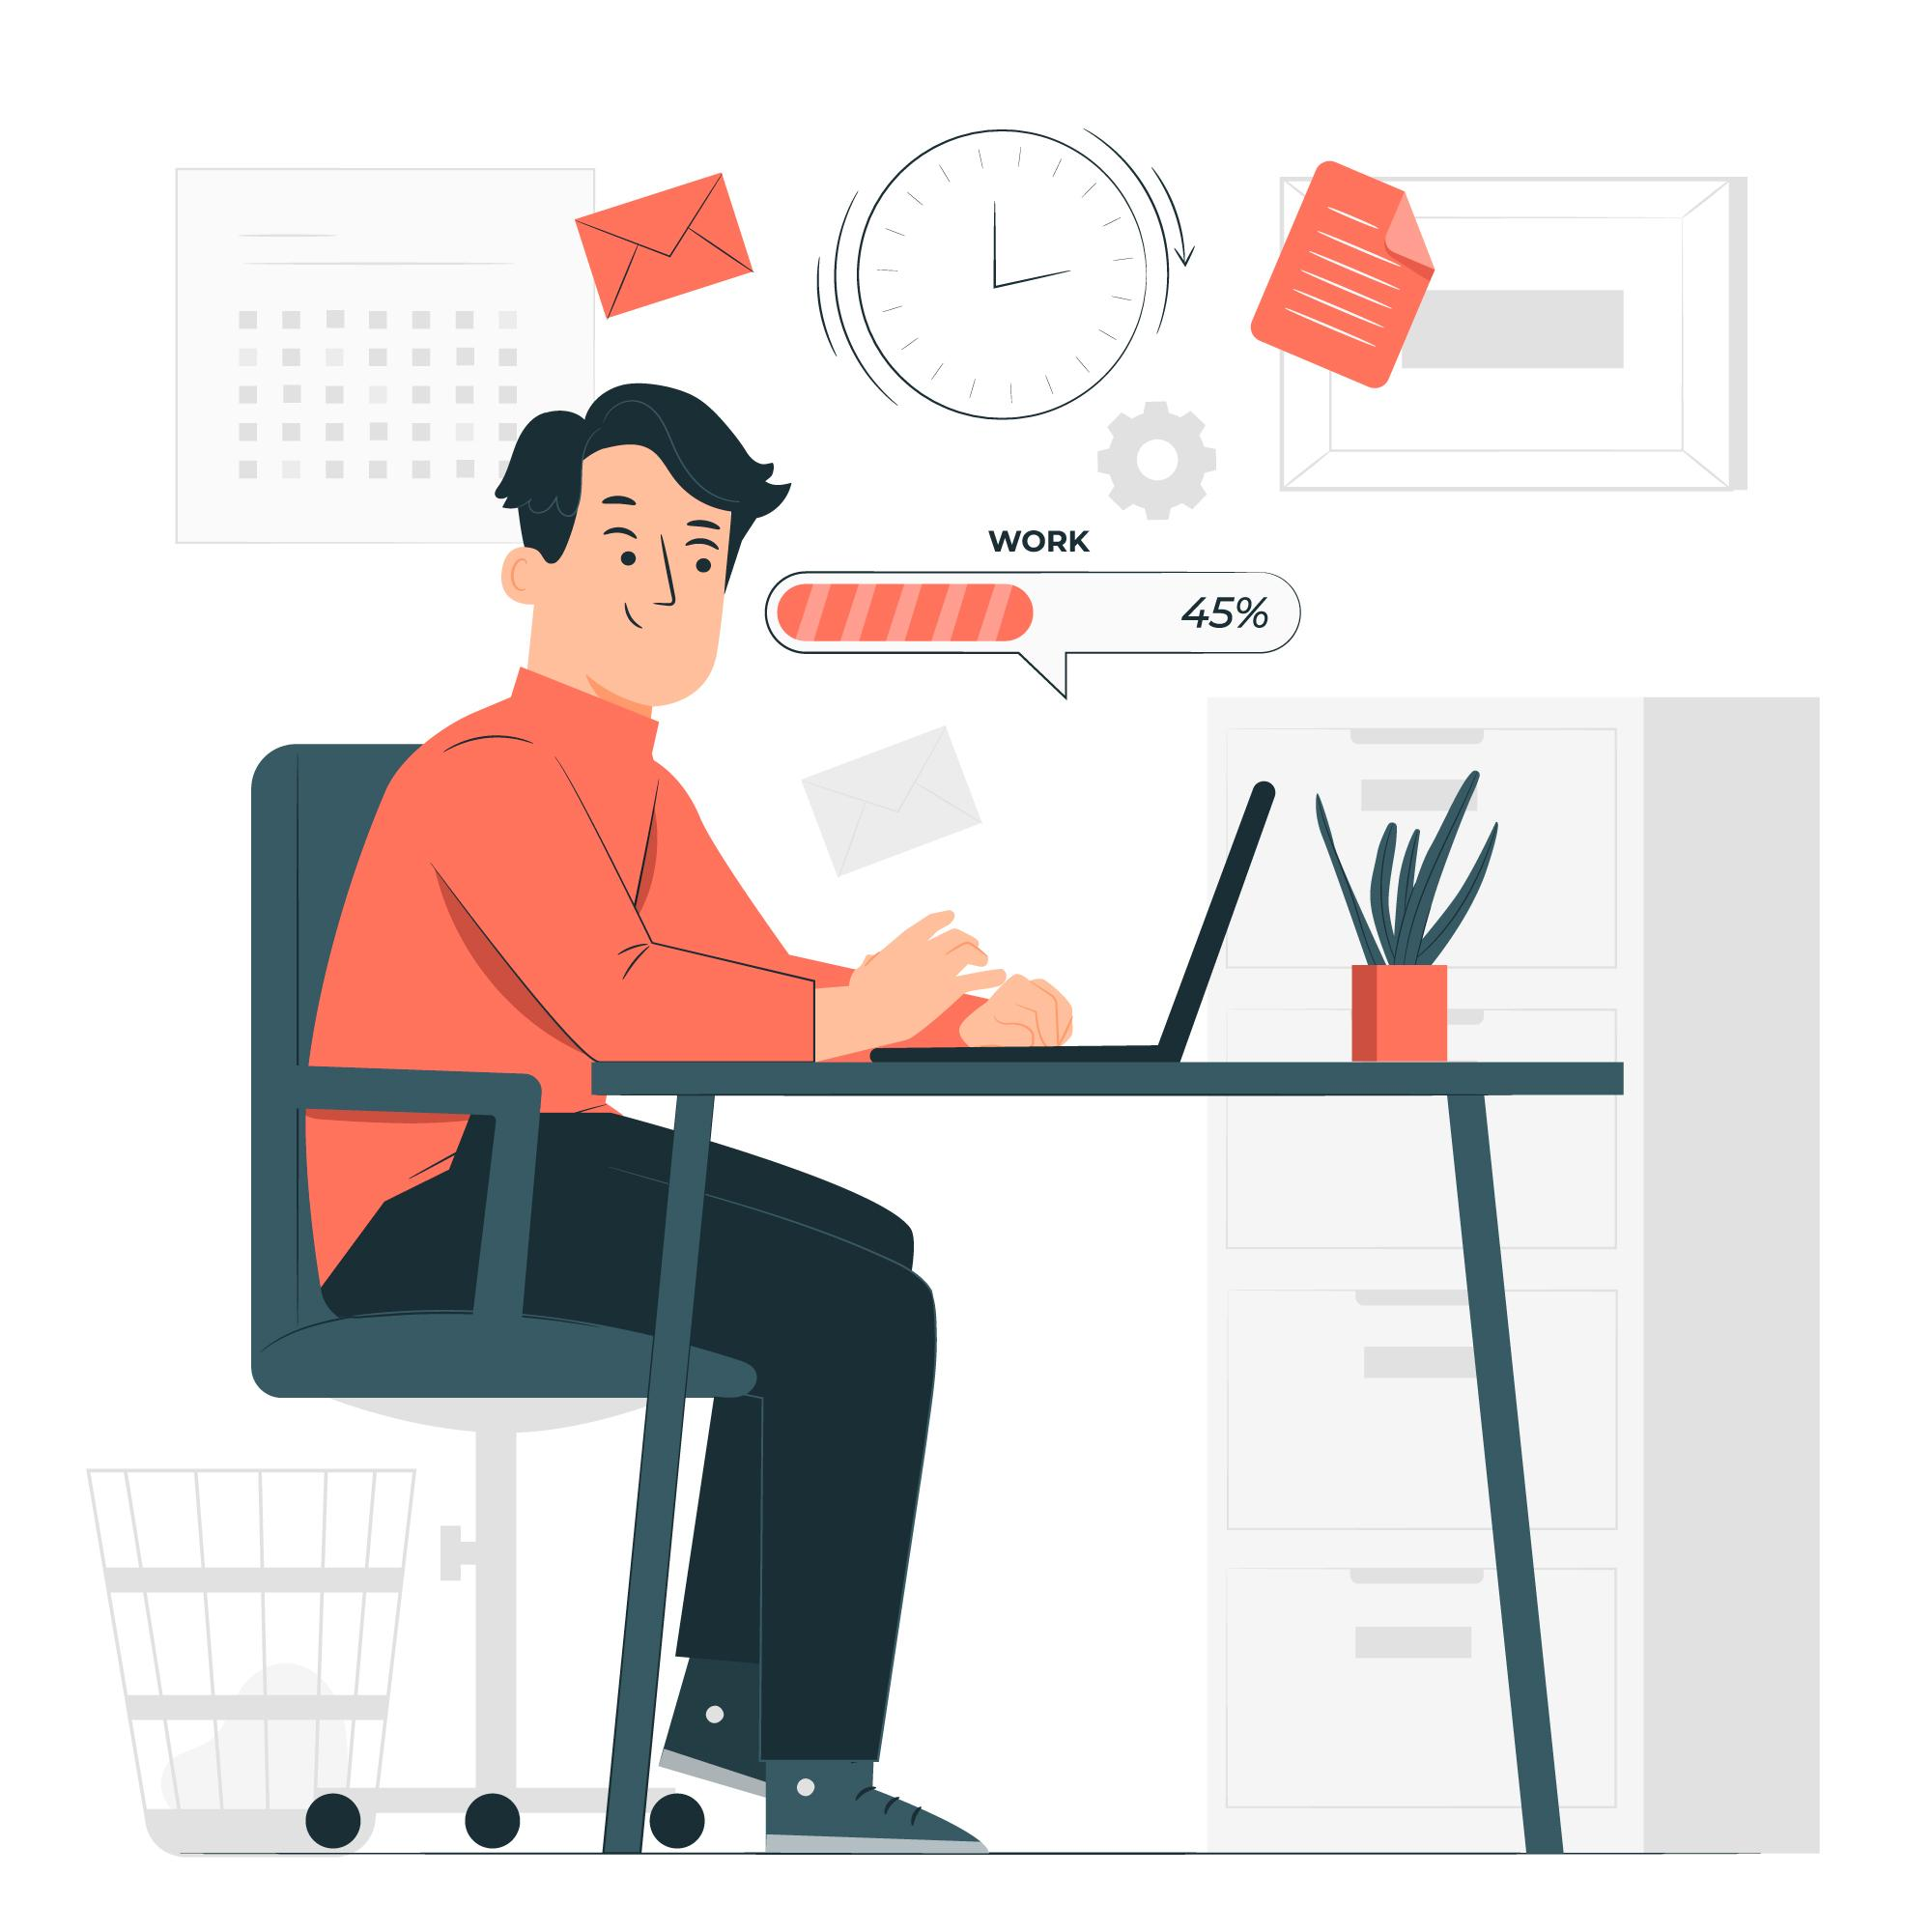
[Image by storyset](https://www.freepik.com/free-vector/work-progress-concept-illustration_12832654.htm#query=work%20in%20progress&position=46&from_view=search) on Freepik